In [6]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/fpinell/mlsa/refs/heads/main/data/assignments/'

us_companies_df = pd.read_csv(url + '/us_companies.csv')
us_taxes_df = pd.read_csv(url + '/us_state_taxes.csv')

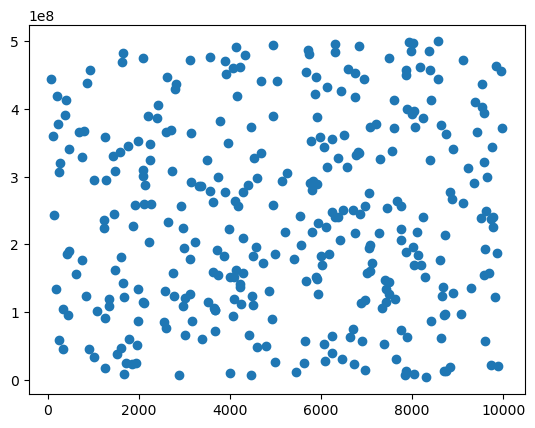

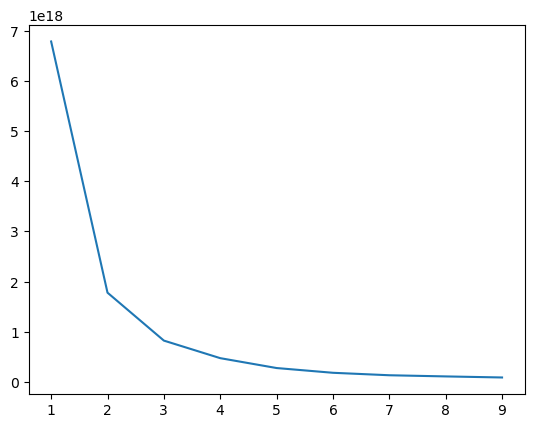

In [9]:
from sklearn.cluster import KMeans

X = pd.DataFrame(us_companies_df, columns=['Number_of_employees', 'Earnings_last_year'], )
plt.scatter(X['Number_of_employees'], X['Earnings_last_year'])
plt.show()

kmeans_per_k = [KMeans(n_clusters=k, random_state=60).fit(X.iloc[:,[0,1]])
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
plt.plot(range(1, 10), inertias)
plt.show()

In [13]:
from sklearn.metrics import silhouette_score
silhouette_score(X.iloc[:,[0,1]], kmeans.labels_)
silhouette_scores = [silhouette_score(X.iloc[:,[0,1]], model.labels_)
                     for model in kmeans_per_k[1:]]
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

NameError: name 'kmeans' is not defined

In [36]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X)

for i,c in enumerate(kmeans.cluster_centers_):
  print('Cluster {} with centroid ({},({})'.format(i,c[0],c[1]))

def compare_centroids(centroids_1,centroids_2):
  '''
  it plots the two arrays of centroids, the first one is for the real ones,
  the second for the ones estimated through clustering
  '''
  plt.scatter(centroids_1[:,0],centroids_1[:,1],marker='o',c='red',label='True')
  plt.scatter(centroids_2[:,0],centroids_2[:,1],marker='x',c='blue',label='Estimated')
  plt.legend(loc='best')

X['cluster_id'] = kmeans.labels_
X.cluster_id.value_counts()

Cluster 0 with centroid (5405.834951456311,(414881865.85291266)
Cluster 1 with centroid (4930.721311475409,(88216153.59565565)
Cluster 2 with centroid (5236.299145299145,(247143199.91572648)


,count
cluster_id,
1,122
2,117
0,103


<ipython-input-46-40119b1a4800>:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
<ipython-input-46-40119b1a4800>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.linspace(mins[1], maxs[1], resolution))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
<ipython-input-46-40119b1a4800>:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (cons

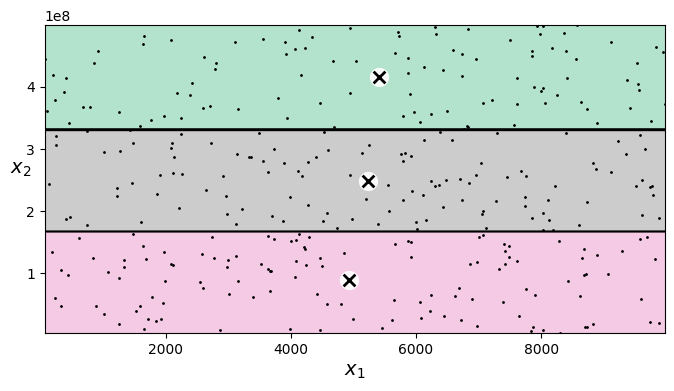

In [46]:
import numpy as np

def plot_data(X):
    plt.plot(X.iloc[:, 0], X.iloc[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
# save_fig("voronoi_plot")
plt.show()

In [53]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
scaled = pd.DataFrame(minmax.fit_transform(X), columns=['scaled_earnings', 'scaled_n_e'])
print(scaled)
scaled.describe()

     scaled_earnings  scaled_n_e
0           0.591116    0.247207
1           0.803735    0.793415
2           0.740232    0.289106
3           0.874306    0.423534
4           0.077335    0.241794
..               ...         ...
337         0.203029    0.950832
338         0.157799    0.937506
339         0.843311    0.167414
340         0.574356    0.579108
341         0.857446    0.888446

[342 rows x 2 columns]


,scaled_earnings,scaled_n_e
count,342.000000,342.000000
mean,0.515735,0.478579
std,0.282897,0.284464
min,0.000000,0.000000
25%,0.274735,0.241606
50%,0.548460,0.470943
75%,0.759768,0.716570
max,1.000000,1.000000


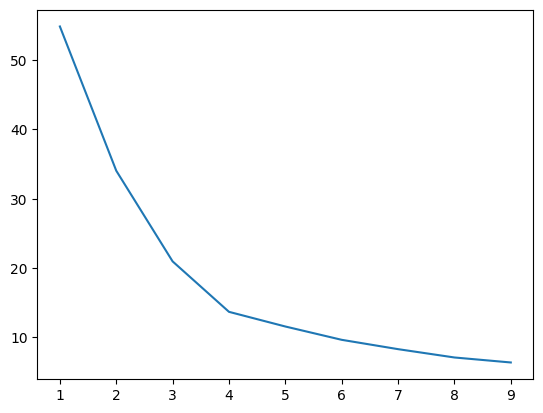

In [57]:
X = scaled
kmeans_per_k = [KMeans(n_clusters=k, random_state=60).fit(X.iloc[:,[0,1]])
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
plt.plot(range(1, 10), inertias)
plt.show()